### Import libraries and packages

In [1]:
# MODEL
from sentence_transformers import SentenceTransformer, util

# DATA CLEANING
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

# VISUALIZATION
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### Initialize the transformation model

In [2]:
# import the model
model = SentenceTransformer('stsb-roberta-large')

### Read the data

In [3]:
# read the data
data = pd.read_csv('adhd.csv')
data.head()

,user_ID,followers_count,user_location,user_description,date,text,hashtags
0,1.365320e+18,52,"Sheffield, England","❤Sal / UK\r\r\n🧡Player of games, Master of non...",10/27/2021 12:40,Saw GP today and we went through stuff and I t...,NaN
1,5.363879e+07,1667,UK,27y/o nonbinary creator. They/Them. disabled. ...,10/27/2021 12:40,My ADHD Graveyard | Officially Diagnosed and A...,NaN
2,1.329360e+18,12,"England, United Kingdom",38. A diagnosis referral is hard in the UK. Se...,10/27/2021 12:37,Have there been any studies of adults or child...,"['askADHD', 'ADHD']"
3,1.242600e+18,8,"West Hempstead, NY",OrganizeU4Life is making an impact on the live...,10/27/2021 12:35,Environmental factors don’t directly cause ADH...,NaN
4,1.429030e+18,48,España,"🔞. Mainly NSFW. He/Him. 28. Gay, Single and Lo...",10/27/2021 12:33,Here in Spain we celebrate the national day of...,['ADHD']


In [4]:
# see a tweet example
data.text[0]

'Saw GP today and we went through stuff and I ticked all the boxs for ADHD. They are sending the referral to try &amp; get an official assessment &amp; diagnosis from the ADHD specialist. We even laughed at how obvious it is. #adhd #audhd #bpd #ChronicPain #mentalillness'

### Clean the data

In [5]:
# remove unnecessary information for tweets

def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    tweet = re.sub ('#', '', tweet)
    return tweet


def remove_emojis(tweet):
    ''' Removes emojis'''
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', tweet)
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`’{|}~•@'

# cleaning master function
def clean_tweet(tweet):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_emojis(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers

    return tweet

In [6]:
data['clean_tweet'] = data.text.apply(clean_tweet)

In [7]:
# make a list of tweets to analyze
tweets_corpus = list(data['clean_tweet'])

### Visualize the most common words

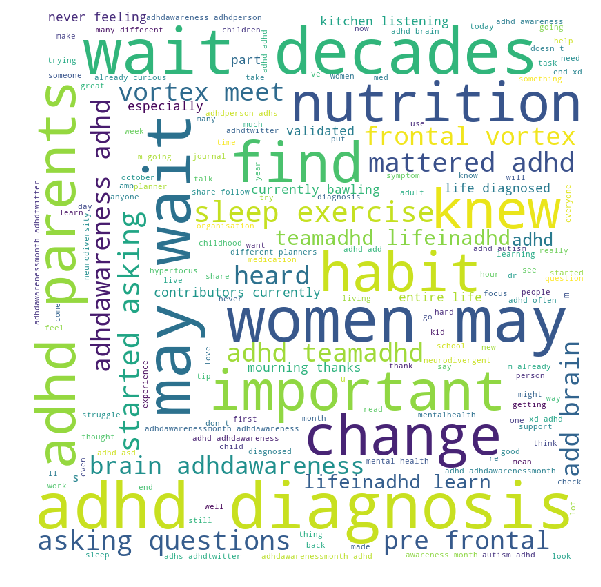

In [8]:
stopwords = set(STOPWORDS)

tweeets = ''

for val in tweets_corpus:

    tokens = val.split()
     
    tweeets += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tweeets)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Introduce the model tweets based on DSM-5

In [9]:
# model tweets based on DSM-5

model_tweet_diagnosis = ["ADHD is diagnosed after manifesting with symptoms of inattention, impulsivity, and hyperactivity. These symptoms should have been present in childhood and in two or more contexts. They could be observed by parents or the individuals. Unfortunately, it is often diagnosed late."]
model_tweet_experience = ["Living with ADHD makes it difficult to read long readings, have conversations, keep things in order, not be messy or to remain focussed on one task. People with ADHD feel restless and unable to remain still at any places."]
model_tweet_impact = ["ADHD symptoms affect the quality of life, either by worsening academic performance, or workplace behavior. It also impacts social life, because people with ADHD find it hard to follow social norms, like waiting for the turn to speak."]
model_tweet_stats = ["ADHD begins in childhood. It is most prevalent in white populations. We see it more often in males than females, and more often in children than adults. Women usually go untreated more often."]
model_tweet_treatment = ["Standard treatments for ADHD in adults typically involve medication, education, skills training and psychological counseling (psychotherapy). Meditation and nutrition play an important role as well."]


print(model_tweet_diagnosis)
print('')
print(model_tweet_experience)
print('')
print(model_tweet_impact)
print('')
print(model_tweet_stats)
print('')
print(model_tweet_treatment)

['ADHD is diagnosed after manifesting with symptoms of inattention, impulsivity, and hyperactivity. These symptoms should have been present in childhood and in two or more contexts. They could be observed by parents or the individuals. Unfortunately, it is often diagnosed late.']

['Living with ADHD makes it difficult to read long readings, have conversations, keep things in order, not be messy or to remain focussed on one task. People with ADHD feel restless and unable to remain still at any places.']

['ADHD symptoms affect the quality of life, either by worsening academic performance, or workplace behavior. It also impacts social life, because people with ADHD find it hard to follow social norms, like waiting for the turn to speak.']

['ADHD begins in childhood. It is most prevalent in white populations. We see it more often in males than females, and more often in children than adults. Women usually go untreated more often.']

['Standard treatments for ADHD in adults typically invo

### Clean the model tweets

In [10]:
# clean the tweets

model_tweet_diagnosis = [clean_tweet(model_tweet_diagnosis[0])]
model_tweet_experience =  [clean_tweet(model_tweet_experience[0])]
model_tweet_impact = [clean_tweet(model_tweet_impact[0])]
model_tweet_stats = [clean_tweet(model_tweet_stats[0])]
model_tweet_treatment = [clean_tweet(model_tweet_treatment[0])]

In [11]:
# see an example of model tweet after cleaning
model_tweet_diagnosis

['adhd is diagnosed after manifesting with symptoms of inattention impulsivity and hyperactivity these symptoms should have been present in childhood and in two or more contexts they could be observed by parents or the individuals unfortunately it is often diagnosed late ']

### Encode the tweets into tensor embeddings (vector)

In [12]:
# encode model tweets
model_tweet_1 = model.encode(model_tweet_diagnosis, convert_to_tensor=True)
model_tweet_2 = model.encode(model_tweet_experience, convert_to_tensor=True)
model_tweet_3 = model.encode(model_tweet_impact, convert_to_tensor=True)
model_tweet_4 = model.encode(model_tweet_stats, convert_to_tensor=True)
model_tweet_5 = model.encode(model_tweet_treatment, convert_to_tensor=True)

The encoding of original tweets takes about 7-8 minutes, due to the big number of data points

In [13]:
# encode list of sentences to get their embeddings
tweets = model.encode(tweets_corpus, convert_to_tensor=True)

In [14]:
# see a tweet after encoding
tweets[0]

tensor([ 0.4461,  0.9575, -0.6277,  ...,  0.7984, -0.4804, -0.3339],
       device='cuda:0')

### Compute Similarity Scores between each original tweet vs model tweet

In [15]:
def similarity(tweets, model_tweet):
    '''
    Computes the cosine similarity betweent two sentences.
    
    Input:
    -----------------------------------------------------
    tweets (list of tensors): all tweets encoded
    model_tweet (tensor): model tweets encoded
    
    Output:
    -----------------------------------------------------
    similarity_score(float): cosine similarity
    '''
    similarity_scores = []
    cosine_scores = util.pytorch_cos_sim(tweets, model_tweet)
    
    for i in range(len(tweets)):
        for j in range(len(model_tweet)):
            similarity = cosine_scores[i][j].item()
            similarity_scores.append(similarity)

    return similarity_scores

### Add similarity scores to the dataset

In [16]:
data['Similarity Score: Diagnosis'] = similarity(tweets, model_tweet_1)

In [17]:
data['Similarity Score: Experience'] = similarity(tweets, model_tweet_2)

In [18]:
data['Similarity Score: Impact'] = similarity(tweets, model_tweet_3)

In [19]:
data['Similarity Score: Stats'] = similarity(tweets, model_tweet_4)

In [20]:
data['Similarity Score: Treatment'] = similarity(tweets, model_tweet_5)

### Choose the most similar category for each tweet

In [21]:
most_similar = []
categories = ['Diagnosis', 'Experience', 'Impact','Stats', 'Treatment']

for i in range(len(data)):
    similarities = list(data.loc[i][8:13])
    maximum = max(similarities)
    most_similar.append(categories[similarities.index(maximum)])

In [22]:
data['Most Similar'] = most_similar

In [23]:
data['Most Similar'].describe()

count         10802
unique            5
top       Treatment
freq           5671
Name: Most Similar, dtype: object

In [24]:
data.head()

,user_ID,followers_count,user_location,user_description,date,text,hashtags,clean_tweet,Similarity Score: Diagnosis,Similarity Score: Experience,Similarity Score: Impact,Similarity Score: Stats,Similarity Score: Treatment,Most Similar
0,1.365320e+18,52,"Sheffield, England","❤Sal / UK\r\r\n🧡Player of games, Master of non...",10/27/2021 12:40,Saw GP today and we went through stuff and I t...,NaN,saw gp today and we went through stuff and i t...,0.248202,0.390584,0.390470,0.174926,0.511050,Treatment
1,5.363879e+07,1667,UK,27y/o nonbinary creator. They/Them. disabled. ...,10/27/2021 12:40,My ADHD Graveyard | Officially Diagnosed and A...,NaN,my adhd graveyard officially diagnosed and all...,0.272836,0.290698,0.319234,0.215616,0.410798,Treatment
2,1.329360e+18,12,"England, United Kingdom",38. A diagnosis referral is hard in the UK. Se...,10/27/2021 12:37,Have there been any studies of adults or child...,"['askADHD', 'ADHD']",have there been any studies of adults or child...,0.477132,0.387748,0.464308,0.414484,0.280158,Diagnosis
3,1.242600e+18,8,"West Hempstead, NY",OrganizeU4Life is making an impact on the live...,10/27/2021 12:35,Environmental factors don’t directly cause ADH...,NaN,environmental factors don t directly cause adh...,0.428835,0.377834,0.437356,0.411145,0.451097,Treatment
4,1.429030e+18,48,España,"🔞. Mainly NSFW. He/Him. 28. Gay, Single and Lo...",10/27/2021 12:33,Here in Spain we celebrate the national day of...,['ADHD'],here in spain we celebrate the national day of...,0.261060,0.362214,0.391657,0.227474,0.438473,Treatment


In [25]:
data['Most Similar'].value_counts()

Treatment     5671
Experience    3969
Impact         714
Diagnosis      350
Stats           98
Name: Most Similar, dtype: int64

### Plots

In [26]:
counts =  list(data['Most Similar'].value_counts())

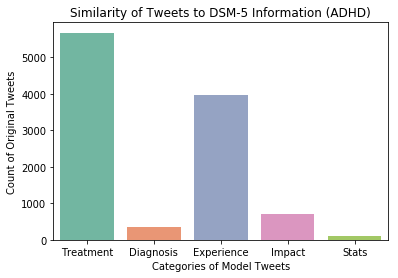

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# count plot on single categorical variable
p = sns.countplot(x ='Most Similar', data = data, palette = "Set2")
p.set_xlabel('Categories of Model Tweets')
p.set_ylabel('Count of Original Tweets')

p.set_title('Similarity of Tweets to DSM-5 Information (ADHD)')
 
# show the plot
plt.show()

In [28]:
treatment_filter = data[data['Most Similar']=='Treatment']
treatment_max = max(list(treatment_filter['Similarity Score: Treatment']))

In [29]:
diagnosis_filter = data[data['Most Similar']=='Diagnosis']
diagnosis_max = max(list(treatment_filter['Similarity Score: Diagnosis']))


In [30]:
experience_filter = data[data['Most Similar']=='Experience']
experience_max = max(list(treatment_filter['Similarity Score: Experience']))

In [31]:
impact_filter = data[data['Most Similar']=='Impact']
impact_max = max(list(treatment_filter['Similarity Score: Impact']))

In [32]:
stats_filter = data[data['Most Similar']=='Stats']
stats_max = max(list(treatment_filter['Similarity Score: Stats']))

In [33]:
maxes = [diagnosis_max, experience_max,impact_max,stats_max, treatment_max]

Text(0.5,1,'Highest Similarity Scores per Category (ADHD)')

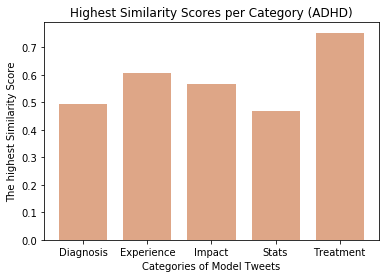

In [34]:
plt.bar(categories, maxes, color ='#dea687',
        width = 0.75)
plt.xlabel('Categories of Model Tweets')
plt.ylabel('The highest Similarity Score')
plt.title('Highest Similarity Scores per Category (ADHD)')

C:\Users\almag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Tweet Counts')

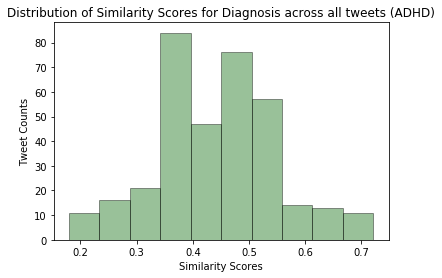

In [35]:
# seaborn histogram
sns.distplot(diagnosis_filter['Similarity Score: Diagnosis'], hist=True, kde=False, 
             bins=10, color = 'darkgreen',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Diagnosis across all tweets (ADHD)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

C:\Users\almag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Tweet Counts')

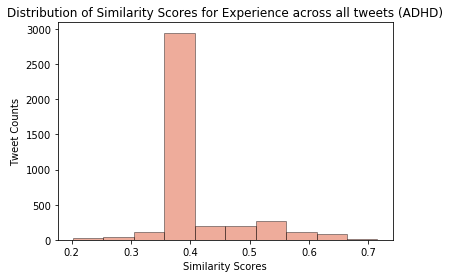

In [36]:
# seaborn histogram
sns.distplot(experience_filter['Similarity Score: Experience'], hist=True, kde=False, 
             bins=10, color = '#d63006',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Experience across all tweets (ADHD)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

C:\Users\almag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Tweet Counts')

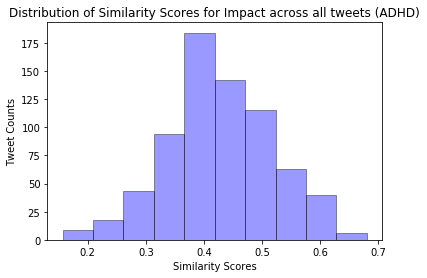

In [37]:
# seaborn histogram
sns.distplot(impact_filter['Similarity Score: Impact'], hist=True, kde=False, 
             bins=10, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Impact across all tweets (ADHD)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

C:\Users\almag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Tweet Counts')

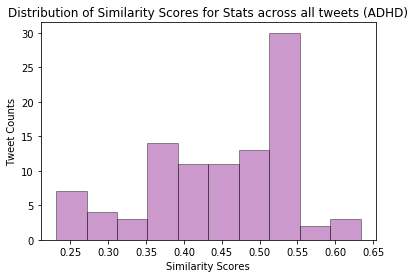

In [38]:
# seaborn histogram
sns.distplot(stats_filter['Similarity Score: Stats'], hist=True, kde=False, 
             bins=10, color = 'purple',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Stats across all tweets (ADHD)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

C:\Users\almag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Tweet Counts')

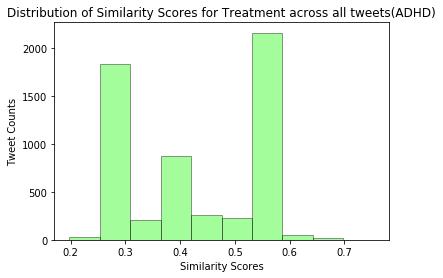

In [39]:
# seaborn histogram
sns.distplot(treatment_filter['Similarity Score: Treatment'], hist=True, kde=False, 
             bins=10, color = '#1afa05',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Treatment across all tweets(ADHD)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

In [40]:
data.to_csv('ADHD with sS scores.csv')